### Binary Classification Problem
#### Team : Farid_Shaheb_Fan_Club

## INITIALIZATION

In [1]:
# ignore warnings for consistent output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The notebook was ran on vscode (pc) & dataset was put to 'dataset' folder

In [3]:
# load dataset
train_set = pd.read_csv('dataset/train.csv')
test_set = pd.read_csv('dataset/test.csv')

In [4]:
# checking dataset shape
print(train_set.shape)
print(test_set.shape)

(621165, 68)
(186734, 67)


In [5]:
# checking target column
train_columns = set(train_set.columns)
test_columns = set(test_set.columns)

difference = train_columns - test_columns
target_column = list(difference)[0]
print("Target Column : ", target_column)

Target Column :  v16


## Initial EDA

In [6]:
# create a copy of the dataset to explore
train = train_set.copy()
test = test_set.copy()

Some Exploration

In [7]:
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
0,1,36802507,39555223,10000.0,10000.0,10000.0,0,12.39,334.01,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8400.0,NaN,NaN,NaN
1,2,34373063,37036411,20000.0,20000.0,20000.0,1,16.49,491.59,3,...,NaN,NaN,NaN,NaN,NaN,NaN,12100.0,NaN,NaN,NaN
2,3,39329649,42133381,8000.0,8000.0,8000.0,0,9.49,256.23,1,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN
3,4,54898516,58469236,16000.0,16000.0,16000.0,0,11.53,527.85,1,...,NaN,NaN,NaN,NaN,NaN,NaN,8300.0,NaN,NaN,NaN
4,5,42513663,45480375,10200.0,10200.0,10200.0,0,18.25,370.04,4,...,NaN,NaN,NaN,NaN,NaN,NaN,19600.0,NaN,NaN,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621165 entries, 0 to 621164
Data columns (total 68 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      621165 non-null  int64  
 1   v1      621165 non-null  int64  
 2   v2      621165 non-null  int64  
 3   v3      621165 non-null  float64
 4   v4      621165 non-null  float64
 5   v5      621165 non-null  float64
 6   v6      621165 non-null  int64  
 7   v7      621165 non-null  float64
 8   v8      621165 non-null  float64
 9   v9      621165 non-null  int64  
 10  v10     621165 non-null  int64  
 11  v11     621165 non-null  int64  
 12  v12     621165 non-null  int64  
 13  v13     621162 non-null  float64
 14  v14     621165 non-null  int64  
 15  v15     621165 non-null  object 
 16  v16     436465 non-null  float64
 17  v17     621165 non-null  int64  
 18  v18     621165 non-null  int64  
 19  v19     621165 non-null  float64
 20  v20     621142 non-null  float64
 21  v21     62

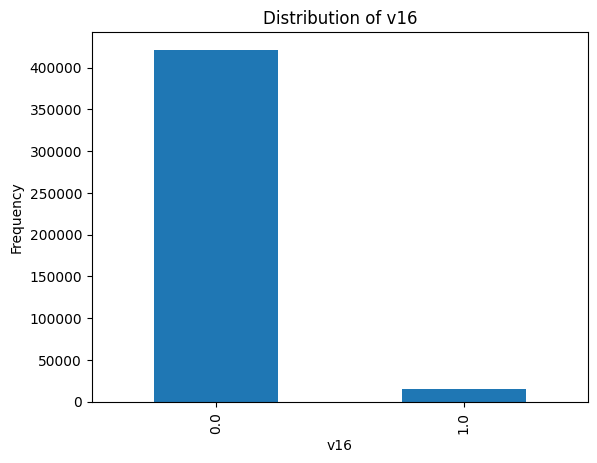

<Figure size 400x400 with 0 Axes>

In [9]:
# plot the distribution of target column

train['v16'].value_counts().plot(kind='bar')
plt.xlabel('v16')
plt.ylabel('Frequency')
plt.title('Distribution of v16')
plt.figure(figsize=(4,4))
plt.show()

The Dataset is quite imbalanced

In [10]:
# check for missing values in target column
train['v16'].isnull().sum()

184700

The target column has some missing values. We are droping those rows

In [11]:
# drop missing values in target column
train = train.dropna(subset=['v16'])
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67
0,1,36802507,39555223,10000.0,10000.0,10000.0,0,12.39,334.01,2,...,NaN,NaN,NaN,NaN,NaN,NaN,8400.0,NaN,NaN,NaN
1,2,34373063,37036411,20000.0,20000.0,20000.0,1,16.49,491.59,3,...,NaN,NaN,NaN,NaN,NaN,NaN,12100.0,NaN,NaN,NaN
2,3,39329649,42133381,8000.0,8000.0,8000.0,0,9.49,256.23,1,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN
3,4,54898516,58469236,16000.0,16000.0,16000.0,0,11.53,527.85,1,...,NaN,NaN,NaN,NaN,NaN,NaN,8300.0,NaN,NaN,NaN
4,5,42513663,45480375,10200.0,10200.0,10200.0,0,18.25,370.04,4,...,NaN,NaN,NaN,NaN,NaN,NaN,19600.0,NaN,NaN,NaN


In [12]:
# recheck for missing values in target column
train['v16'].isnull().sum()

0

In [13]:
# Print columns with missing values and their missing count
missing_values = train.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

v22    215685
v23    364241
v27       189
v39      6090
v42        21
v44    316088
v47    436156
v48    436157
v51      2642
v52      2642
v53    427224
v54    427224
v55    427224
v56    427224
v57    427478
v58    427224
v59    428388
v60    427224
v61    427224
v62    427224
v63    427224
v64      2642
v65    427224
v66    427224
v67    427224
dtype: int64


There are some column with really high missing count. 

In [14]:
# Get columns with more than 50000 null values
threshold = 50000

columns_with_nulls = train.columns[train.isnull().sum() > threshold]
print(columns_with_nulls)

Index(['v22', 'v23', 'v44', 'v47', 'v48', 'v53', 'v54', 'v55', 'v56', 'v57',
       'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v65', 'v66', 'v67'],
      dtype='object')


In [15]:
# Get the description of columns with null values

description = pd.DataFrame()
df = train[columns_with_nulls]

description['missing'] = df.isnull().sum()
description['non-null'] = df.notnull().sum()
description['total'] = df.shape[0]
description['dtype'] = df.dtypes
description['unique'] = df.nunique()

description 

,missing,non-null,total,dtype,unique
v22,215685,220780,436465,float64,145
v23,364241,72224,436465,float64,121
v44,316088,120377,436465,float64,165
v47,436156,309,436465,float64,230
v48,436157,308,436465,float64,279
v53,427224,9241,436465,float64,10
v54,427224,9241,436465,float64,32
v55,427224,9241,436465,float64,11
v56,427224,9241,436465,float64,16
v57,427478,8987,436465,float64,179


For now, we are __dropping__ them, we will __re-include__ these column later.

In [16]:
# Drop columns with more than 50000 missing values
# Will re-investigate these columns later

train = train.drop(columns=columns_with_nulls)
test = test_set.drop(columns=columns_with_nulls)
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v41,v42,v43,v45,v46,v49,v50,v51,v52,v64
0,1,36802507,39555223,10000.0,10000.0,10000.0,0,12.39,334.01,2,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,0.0,14847.0,8400.0
1,2,34373063,37036411,20000.0,20000.0,20000.0,1,16.49,491.59,3,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,0.0,208403.0,12100.0
2,3,39329649,42133381,8000.0,8000.0,8000.0,0,9.49,256.23,1,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,205.0,33548.0,16000.0
3,4,54898516,58469236,16000.0,16000.0,16000.0,0,11.53,527.85,1,...,Feb-2016,Jan-2016,2.0,1.0,0,3,0.0,1895.0,79092.0,8300.0
4,5,42513663,45480375,10200.0,10200.0,10200.0,0,18.25,370.04,4,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,0.0,135155.0,19600.0


In [17]:
# droping unnecessary columns
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [18]:
print(train.shape, test.shape)

(436465, 48) (186734, 47)


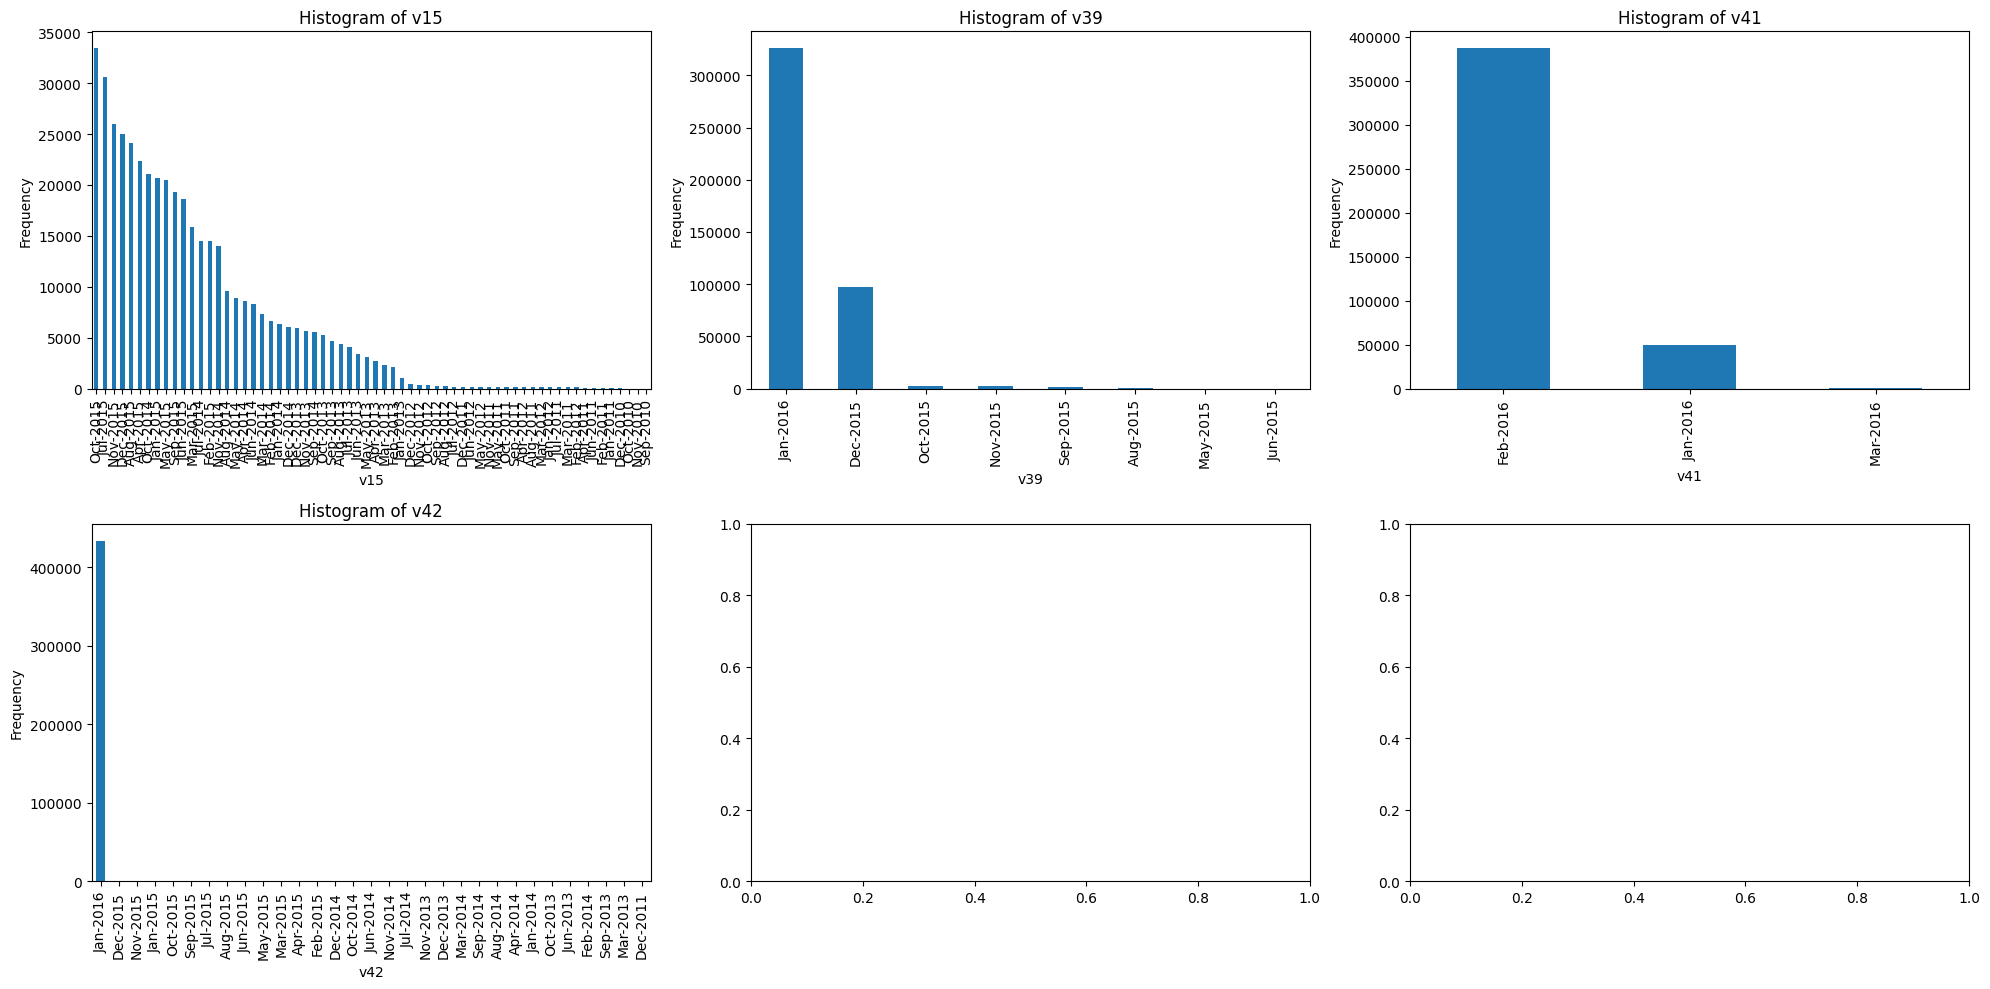

In [19]:
# Plot all the columns with categorical values in a grid with 4 columns
categorical_columns = train.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(len(categorical_columns) // 3 + 1, 3, figsize=(20, 5 * (len(categorical_columns) // 3 + 1)))

for i, col in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]
    train[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

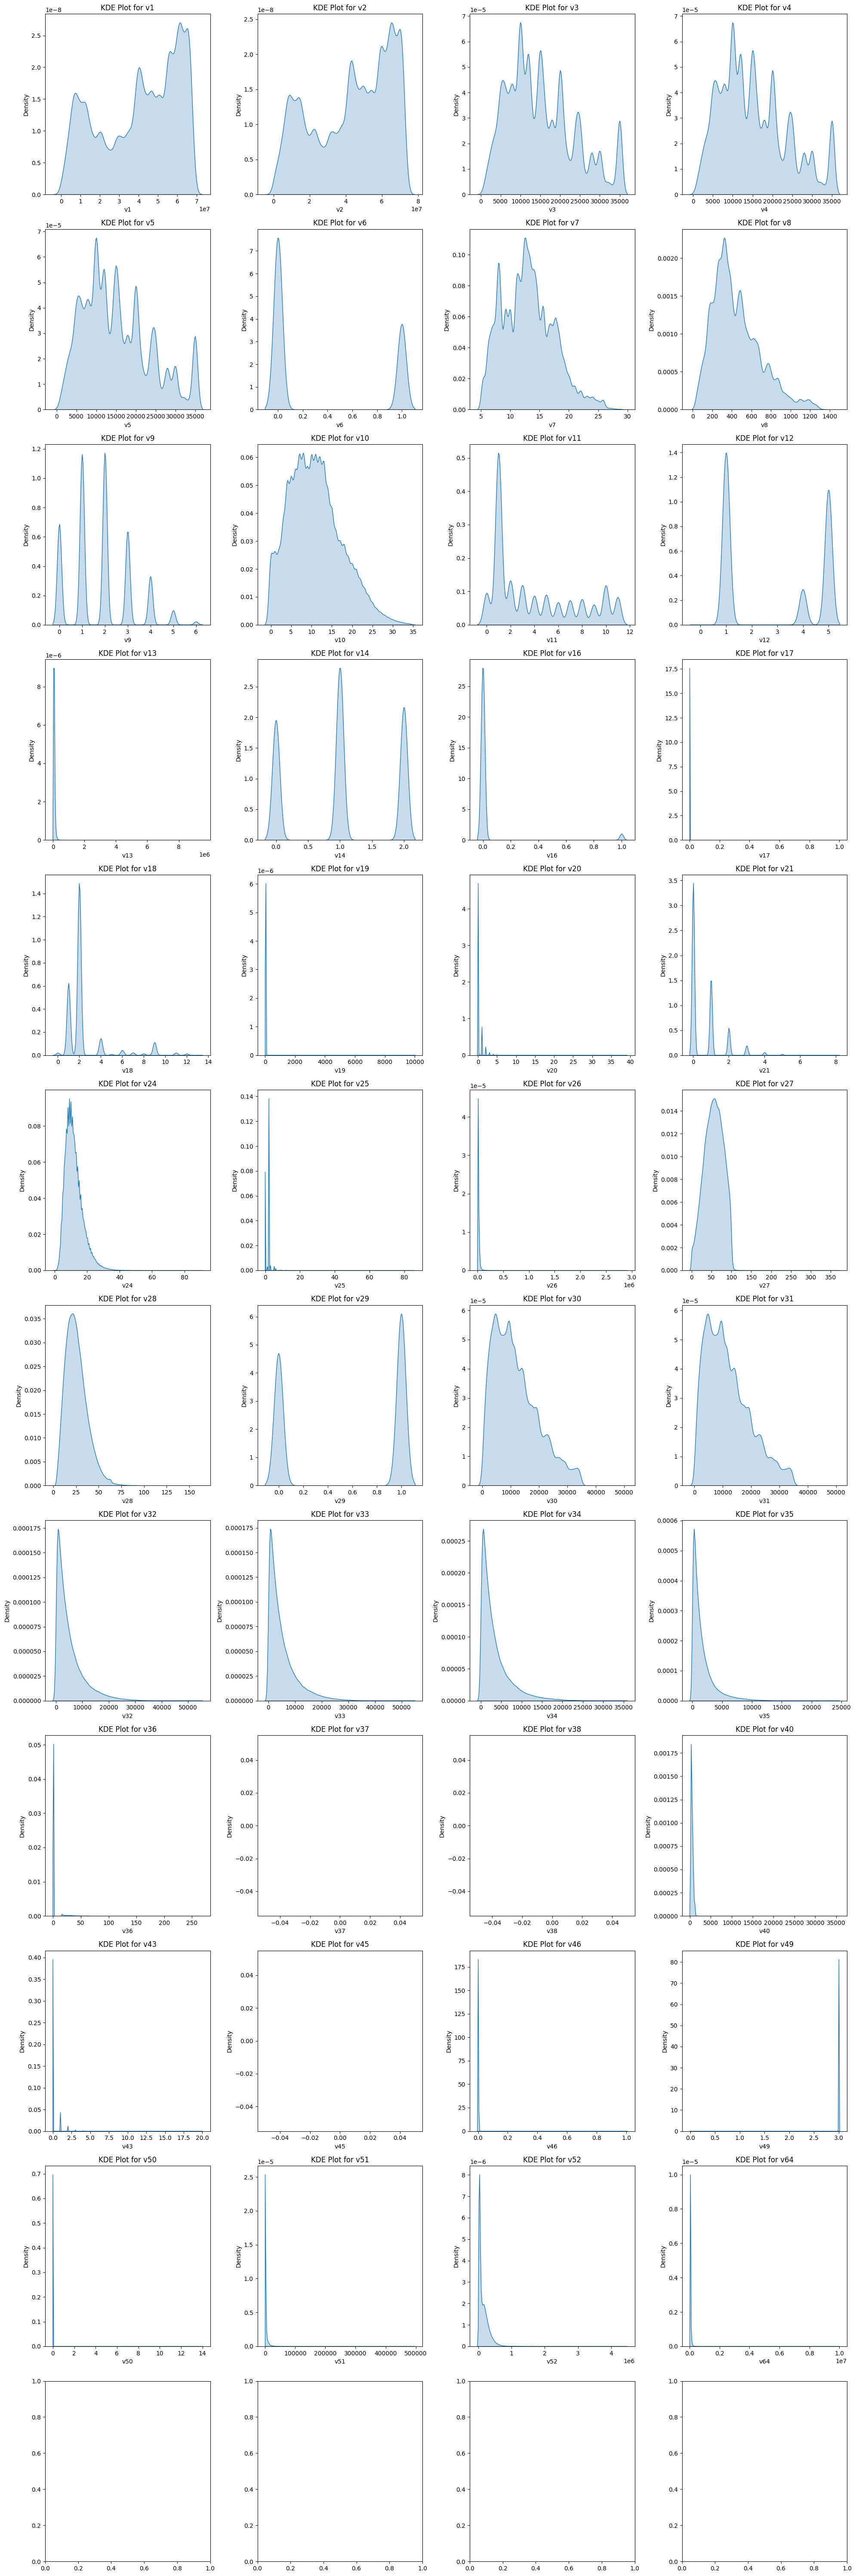

In [20]:
# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Plot KDE for numerical columns in a grid of 4 columns
fig, axes = plt.subplots(len(numerical_columns) // 4 + 1, 4, figsize=(20, 5 * (len(numerical_columns) // 4 + 1)))

for i, col in enumerate(numerical_columns):
    ax = axes[i // 4, i % 4]
    sns.kdeplot(train[col].dropna(), fill=True, ax=ax)
    ax.set_title(f'KDE Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

## Handle Missing Value

Indentify different types of columns with missing value

In [21]:
# Print columns with missing values
missing_columns = train.columns[train.isnull().any()]
missing_columns_numerical = train[missing_columns].select_dtypes(include=np.number).columns
missing_columns_categorical = train[missing_columns].select_dtypes(include='object').columns
print(missing_columns)
print(missing_columns_numerical)
print(missing_columns_categorical)

Index(['v27', 'v39', 'v42', 'v51', 'v52', 'v64'], dtype='object')
Index(['v27', 'v51', 'v52', 'v64'], dtype='object')
Index(['v39', 'v42'], dtype='object')


In [22]:
# Generate a description of missing values
description = pd.DataFrame()
df = train[missing_columns]

description['missing'] = df.isnull().sum()
description['non-null'] = df.notnull().sum()
description['total'] = df.shape[0]
description['dtype'] = df.dtypes
description['unique'] = df.nunique()

description 

,missing,non-null,total,dtype,unique
v27,189,436276,436465,float64,1208
v39,6090,430375,436465,object,8
v42,21,436444,436465,object,31
v51,2642,433823,436465,float64,7945
v52,2642,433823,436465,float64,234211
v64,2642,433823,436465,float64,11817


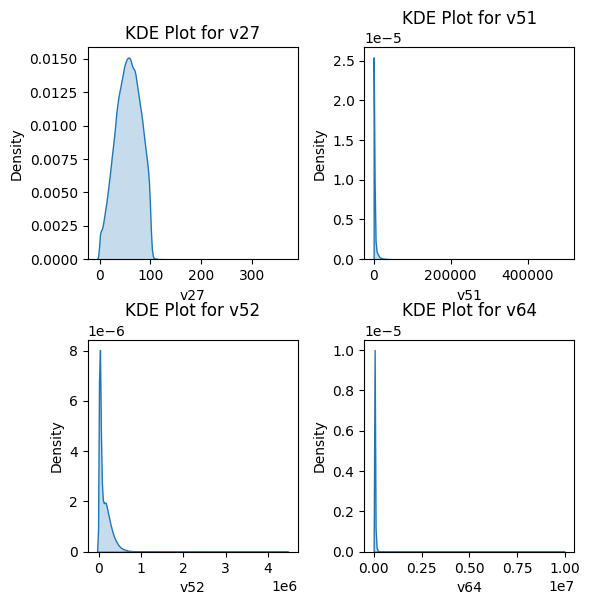

In [23]:
# Plot KDE for numerical columns with missing values in a grid of 2 columns
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for i, col in enumerate(missing_columns_numerical):
    sns.kdeplot(train[col].dropna(), fill=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'KDE Plot for {col}')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

plt.tight_layout()
plt.show()

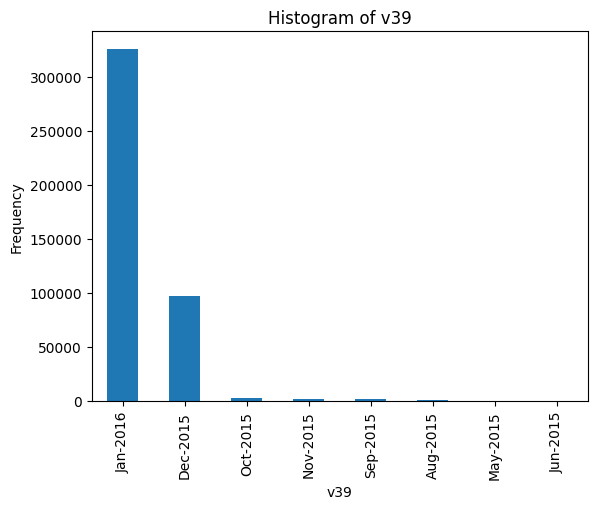

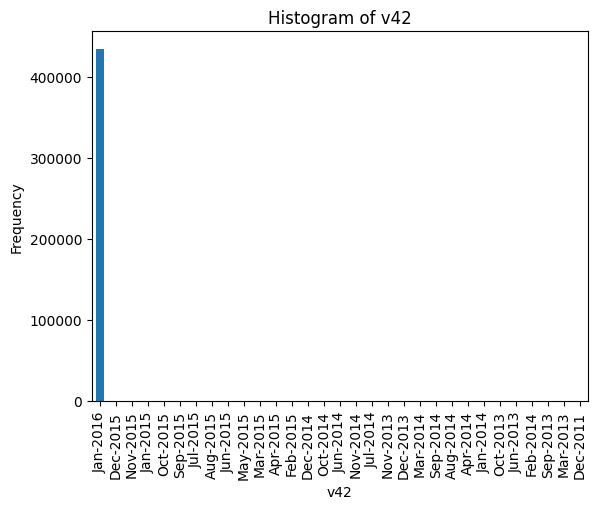

In [24]:
# Plot histogram for categorical columns with missing values
for col in missing_columns_categorical:
    train[col].value_counts().plot(kind='bar', title=f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Handling Missing Numerical Data

In [25]:
# copy the dataset to distinguish between the original and the modified dataset
new_train = train.copy()
new_test = test.copy()

In [26]:
# determine if a column is normal or skewed using the normaltest function from scipy.stats

from scipy.stats import normaltest
df = new_train[missing_columns_numerical].copy()

def is_normal(column):
    stat, p = normaltest(column.dropna())
    return p > 0.05  # p > 0.05 suggests normal distribution

# Check distribution type for each numerical column with missing values
distribution_info = {col: 'normal' if is_normal(df[col]) else 'skewed' for col in missing_columns_numerical}
distribution_info_normaltest = distribution_info
pd.DataFrame(distribution_info_normaltest.items(), columns=['Column', 'Distribution'])


,Column,Distribution
0,v27,skewed
1,v51,skewed
2,v52,skewed
3,v64,skewed


In [27]:
# determine if a column is normal or skewed using skew and kurtosis

def is_normal(column, skew_threshold=0.5, kurtosis_threshold=3.0):
    skew = column.dropna().skew()
    kurtosis = column.dropna().kurt()
    return abs(skew) < skew_threshold and abs(kurtosis) < kurtosis_threshold

# Check distribution type for each numerical column with missing values
df = new_train[missing_columns_numerical].copy()
distribution_info = {col: 'normal' if is_normal(df[col]) else 'skewed' for col in missing_columns_numerical}
distribution_info_skew_kurt = distribution_info
pd.DataFrame(distribution_info_skew_kurt.items(), columns=['Column', 'Distribution'])

,Column,Distribution
0,v27,normal
1,v51,skewed
2,v52,skewed
3,v64,skewed


We will be using skew and kurtosis checking method

In [28]:
# Find the most correlated column for each column with missing values
# We wil use this correlated_cols dictionary to fill missing values

correlation_threshold = 0.5  # Define a high correlation threshold
correlated_cols = {}

numerical_columns = new_train.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('v16') # Drop the target column

df_numerical = new_train[numerical_columns].copy()
test_numerical = new_test[numerical_columns].copy()

# For each column with missing values
for col in missing_columns_numerical:
    # Identify the most correlated column meeting the threshold, which may or may not have missing values
    most_correlated_col = df_numerical.corr()[col].abs().nlargest(2).index[1]  # Skip self-correlation
    if df_numerical.corr()[col].abs()[most_correlated_col] > correlation_threshold:
        correlated_cols[col] = most_correlated_col

correlated_cols

{'v52': 'v12', 'v64': 'v26'}

Found correlated column for v52 & v64

In [29]:
# Impute missing values using KNNImputer and Linear Regression
# We will use KNNImputer for columns with low correlation and Linear Regression for columns with high correlation
# We will also use mean or median imputation for columns with normal distribution
# We will use the correlated column to impute missing values for columns with high correlation
# We will use the same transformation for the test set
# We will use the distribution_info_skew_kurt dictionary to determine the imputation method for each column
# We will use the correlated_cols dictionary to determine the correlated column for each column with missing values

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import numpy as np

def advanced_impute(df, test_df, distribution_info, correlated_cols, k_neighbors=5):
    # Mean or Median Imputation
    for col in distribution_info:
        if col not in correlated_cols:  # Skip for high-correlation columns
            if distribution_info[col] == 'normal':
                df[col].fillna(df[col].mean(), inplace=True)
                test_df[col].fillna(test_df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
                test_df[col].fillna(test_df[col].median(), inplace=True)
    
    # KNN Imputation for remaining columns (low correlation, but shared information)
    knn_imputer = KNNImputer(n_neighbors=k_neighbors)
    df[missing_columns_numerical] = knn_imputer.fit_transform(df[missing_columns_numerical])
    test_df[missing_columns_numerical] = knn_imputer.transform(test_df[missing_columns_numerical])

    # Regression Imputation for high-correlation columns
    for col, corr_col in correlated_cols.items():
        missing = df[col].isnull()
        if missing.any():
            reg = LinearRegression()
            reg.fit(df.loc[~missing, [corr_col]], df.loc[~missing, col])
            df.loc[missing, col] = reg.predict(df.loc[missing, [corr_col]])
        
        # Apply the same transformation to the test_df
        test_missing = test_df[col].isnull()
        if test_missing.any():
            test_df.loc[test_missing, col] = reg.predict(test_df.loc[test_missing, [corr_col]])
            
    return df, test_df

# Applying the function to the dataset
df_imputed, test_df_imputed = advanced_impute(df_numerical, test_numerical, distribution_info_skew_kurt, correlated_cols)
print(df_imputed.shape)
print(test_df_imputed.shape)

(436465, 43)
(186734, 43)


In [30]:
# Check for missing values if any

train_imputed = train.copy()
train_imputed[numerical_columns] = df_imputed
test_imputed = test.copy()
test_imputed[numerical_columns] = test_df_imputed

print("Train Set")
print("Total Missing : ", train_imputed.isnull().sum().sum())
print("Total Missing in numerical cols: ", train_imputed[numerical_columns].isnull().sum().sum())
print("Shape : ", train_imputed.shape)
print("Test Set")
print("Total Missing : ", test_imputed.isnull().sum().sum())
print("Total Missing in numerical cols: ", test_imputed[numerical_columns].isnull().sum().sum())
print("Shape : ", test_imputed.shape)

train_imputed.head()

Train Set
Total Missing :  6111
Total Missing in numerical cols:  0
Shape :  (436465, 48)
Test Set
Total Missing :  2627
Total Missing in numerical cols:  0
Shape :  (186734, 47)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v41,v42,v43,v45,v46,v49,v50,v51,v52,v64
0,36802507,39555223,10000.0,10000.0,10000.0,0,12.39,334.01,2,10,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,0.0,14847.0,8400.0
1,34373063,37036411,20000.0,20000.0,20000.0,1,16.49,491.59,3,17,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,0.0,208403.0,12100.0
2,39329649,42133381,8000.0,8000.0,8000.0,0,9.49,256.23,1,6,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,205.0,33548.0,16000.0
3,54898516,58469236,16000.0,16000.0,16000.0,0,11.53,527.85,1,9,...,Feb-2016,Jan-2016,2.0,1.0,0,3,0.0,1895.0,79092.0,8300.0
4,42513663,45480375,10200.0,10200.0,10200.0,0,18.25,370.04,4,20,...,Feb-2016,Jan-2016,0.0,1.0,0,3,0.0,0.0,135155.0,19600.0


Missing data handled for now in numerical cols

### Handling Missing Categorical Data

In [31]:
df = train_imputed
test_df = test_imputed

In [32]:
# Check for missing values in categorical columns
df[missing_columns_categorical].isnull().sum()

v39    6090
v42      21
dtype: int64

In [33]:
# Check for missing values in categorical columns
test_df[missing_columns_categorical].isnull().sum()

v39    2618
v42       9
dtype: int64

In [34]:
# Fill missing values with most frequent value

for col in missing_columns_categorical:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    test_df[col].fillna(mode_value, inplace=True)

# Verify that there are no missing values left
print(df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [35]:
# Check for missing values in dataset
df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

## Handling Skewness

In [36]:
numerical_columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v17', 'v18', 'v19', 'v20', 'v21', 'v24', 'v25',
       'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35',
       'v36', 'v37', 'v38', 'v40', 'v43', 'v45', 'v46', 'v49', 'v50', 'v51',
       'v52', 'v64'],
      dtype='object')

In [37]:
new_train_1 = df.copy()
new_test_1 = test_df.copy()

In [38]:
# Check for skewness in numerical columns
skewed_columns = new_train_1[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_columns = skewed_columns[abs(skewed_columns) > 0.99]
print(skewed_columns)

v19    434.526156
v17    295.449827
v64     79.334354
v51     59.385510
v13     50.344648
v46     37.543555
v40     27.509231
v50     26.018524
v36     19.834019
v43     16.594675
v26     15.831715
v25     13.953027
v20      5.339477
v35      2.918490
v52      2.779541
v18      2.607519
v34      2.330547
v32      2.113907
v33      2.107323
v21      1.797102
v24      1.267233
v49    -43.263196
dtype: float64


In [39]:
# Apply log, square root, or box-cox transformation to reduce skewness

from scipy.stats import boxcox

def handle_skewness(df, test_df, skewed_columns):
    for col in skewed_columns.index:
        # Log transformation
        df_log = np.log1p(df[col])
        skew_log = df_log.skew()
        
        # Square root transformation
        df_sqrt = np.sqrt(df[col])
        skew_sqrt = df_sqrt.skew()
        
        # Box-Cox transformation (only for positive values)
        if (df[col] > 0).all():
            df_boxcox, _ = boxcox(df[col])
            skew_boxcox = pd.Series(df_boxcox).skew()
        else:
            skew_boxcox = np.inf
        
        # Determine the best transformation
        skews = {'log': abs(skew_log), 'sqrt': abs(skew_sqrt), 'boxcox': abs(skew_boxcox)}
        best_transformation = min(skews, key=skews.get)
        
        if best_transformation == 'log':
            df[col] = df_log
            test_df[col] = np.log1p(test_df[col])
        elif best_transformation == 'sqrt':
            df[col] = df_sqrt
            test_df[col] = np.sqrt(test_df[col])
        elif best_transformation == 'boxcox':
            df[col], _ = boxcox(df[col])
            test_df[col] = boxcox(test_df[col])
        
    return df, test_df

# create a copy of the dataset to distinguish between the original and the modified dataset
new_train_1_skew = new_train_1[new_train_1.columns]
new_test_1_skew = new_test_1[new_test_1.columns]

new_train_1_fixed, new_test_1_fixed = handle_skewness(new_train_1_skew, new_test_1_skew, skewed_columns)

In [40]:
# after transformation
skewed_columns = new_train_1_fixed[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_columns = skewed_columns[abs(skewed_columns) > 0.99]
print(skewed_columns)

v17    295.449827
v46     37.543555
v50     14.134410
v36     10.761856
v43      8.066065
v51      2.243030
v25      2.241164
v26      2.062507
v20      2.042892
v40      1.849009
v18      1.375313
v35      1.107037
v19     -1.107548
v49    -45.625285
dtype: float64


Skeness handled for most of the dataset, But skewness could not be removed completely from some cols  

## One hot encoding

In [41]:
new_train_1 = new_train_1_fixed
new_test_1 = new_test_1_fixed

In [42]:
# Handle categorical columns
categorical_columns = new_train_1.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['v15', 'v39', 'v41', 'v42'], dtype='object')


In [43]:
new_train_2 = new_train_1.copy()
new_test_2 = new_test_1.copy()

In [44]:
categorical_columns_short = ['v39', 'v41']
categorical_columns_large = ['v15', 'v42']

### v39, v41

In [45]:
# Drop columns with too many unique values for v39 & v41

for col in categorical_columns_short:
    counts = new_train_2[col].value_counts()
    others = counts[counts < 10].index
    test_others = new_test_2[col].value_counts().index.difference(counts.index)
    new_train_2[col] = new_train_2[col].replace(others, 'other')
    new_test_2[col] = new_test_2[col].replace(others.union(test_others), 'other')

new_train_2 = pd.get_dummies(new_train_2, columns=categorical_columns_short, drop_first=True)
new_test_2 = pd.get_dummies(new_test_2, columns=categorical_columns_short, drop_first=True)

In [46]:
new_train_2.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33',
       'v34', 'v35', 'v36', 'v37', 'v38', 'v40', 'v42', 'v43', 'v45', 'v46',
       'v49', 'v50', 'v51', 'v52', 'v64', 'v39_Dec-2015', 'v39_Jan-2016',
       'v39_Nov-2015', 'v39_Oct-2015', 'v39_Sep-2015', 'v39_other',
       'v41_Jan-2016', 'v41_Mar-2016'],
      dtype='object')

In [47]:
new_test_2.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v17', 'v18', 'v19', 'v20', 'v21', 'v24',
       'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34',
       'v35', 'v36', 'v37', 'v38', 'v40', 'v42', 'v43', 'v45', 'v46', 'v49',
       'v50', 'v51', 'v52', 'v64', 'v39_Dec-2015', 'v39_Jan-2016',
       'v39_Nov-2015', 'v39_Oct-2015', 'v39_Sep-2015', 'v41_Jan-2016',
       'v41_Mar-2016'],
      dtype='object')

In [48]:
# Add missing columns from new_train_2 to new_test_2 with value 0
missing_cols = set(new_train_2.columns) - set(new_test_2.columns)
for col in missing_cols:
    new_test_2[col] = 0

# Ensure the columns are in the same order
new_test_2 = new_test_2[new_train_2.columns]
new_test_2.drop(columns=['v16'], inplace=True) # Drop the target column

new_test_2.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v64,v39_Dec-2015,v39_Jan-2016,v39_Nov-2015,v39_Oct-2015,v39_Sep-2015,v39_other,v41_Jan-2016,v41_Mar-2016
0,27610673,30113747,21000.0,21000.0,21000.0,0,10.15,679.10,1,6,...,11.304018,9.609184,False,True,False,False,False,0,False,False
1,28102260,30615399,8000.0,8000.0,8000.0,0,15.61,279.72,3,15,...,10.559115,9.648660,False,True,False,False,False,0,False,False
2,57324697,61027428,35000.0,35000.0,34875.0,0,16.99,1247.68,3,17,...,11.393534,10.889323,False,True,False,False,False,0,False,False
3,61402817,65521655,24000.0,24000.0,24000.0,0,12.29,800.48,2,10,...,12.153104,10.457401,False,True,False,False,False,0,False,False
4,38700393,41485242,28000.0,28000.0,27950.0,1,14.31,656.02,2,13,...,10.831707,11.097425,False,True,False,False,False,0,False,False


In [49]:
new_train_2.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33',
       'v34', 'v35', 'v36', 'v37', 'v38', 'v40', 'v42', 'v43', 'v45', 'v46',
       'v49', 'v50', 'v51', 'v52', 'v64', 'v39_Dec-2015', 'v39_Jan-2016',
       'v39_Nov-2015', 'v39_Oct-2015', 'v39_Sep-2015', 'v39_other',
       'v41_Jan-2016', 'v41_Mar-2016'],
      dtype='object')

In [50]:
new_test_2.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v17', 'v18', 'v19', 'v20', 'v21', 'v24',
       'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34',
       'v35', 'v36', 'v37', 'v38', 'v40', 'v42', 'v43', 'v45', 'v46', 'v49',
       'v50', 'v51', 'v52', 'v64', 'v39_Dec-2015', 'v39_Jan-2016',
       'v39_Nov-2015', 'v39_Oct-2015', 'v39_Sep-2015', 'v39_other',
       'v41_Jan-2016', 'v41_Mar-2016'],
      dtype='object')

### v15, v42

Now manipulating the v15 & v42

In [51]:
new_train_2['v15'].unique()

array(['Jan-2015', 'Nov-2014', 'Jul-2015', 'Mar-2015', 'Nov-2015',
       'Feb-2015', 'Jul-2014', 'Dec-2015', 'Jun-2015', 'Sep-2015',
       'Oct-2014', 'Oct-2015', 'Aug-2013', 'Apr-2015', 'Dec-2013',
       'Apr-2014', 'Feb-2013', 'Feb-2014', 'Jun-2014', 'May-2014',
       'Aug-2015', 'May-2015', 'Sep-2014', 'Dec-2014', 'Feb-2012',
       'Dec-2012', 'Oct-2013', 'May-2013', 'Jul-2012', 'Apr-2013',
       'Feb-2011', 'Aug-2014', 'Nov-2013', 'Jan-2014', 'Jun-2013',
       'Mar-2014', 'Jul-2013', 'Nov-2012', 'Mar-2013', 'Sep-2013',
       'Jan-2013', 'Jul-2011', 'Oct-2012', 'Apr-2012', 'May-2011',
       'Dec-2011', 'Sep-2011', 'Oct-2011', 'Aug-2012', 'Nov-2011',
       'Jun-2012', 'Apr-2011', 'Jan-2012', 'Sep-2012', 'Mar-2012',
       'Aug-2011', 'Dec-2010', 'Mar-2011', 'May-2012', 'Jun-2011',
       'Jan-2011', 'Oct-2010', 'Nov-2010', 'Sep-2010'], dtype=object)

In [52]:
# Convert v15 to a numerical column
# Convert the month-year format to a numerical value
# for example, Jan-2000 will be 0, Feb-2000 will be 1, Dec-2000 will be 11, Jan-2001 will be 12, and so on

new_train_2['v15'] = pd.to_datetime(new_train_2['v15'], format='%b-%Y')
new_train_2['v15'] = (new_train_2['v15'].dt.year - 2000) * 12 + new_train_2['v15'].dt.month - 1

new_test_2['v15'] = pd.to_datetime(new_test_2['v15'], format='%b-%Y')
new_test_2['v15'] = (new_test_2['v15'].dt.year - 2000) * 12 + new_test_2['v15'].dt.month - 1

In [53]:
# Similarly, convert v42 to a numerical column
new_train_2['v42'] = pd.to_datetime(new_train_2['v42'], format='%b-%Y')
new_train_2['v42'] = (new_train_2['v42'].dt.year - 2000) * 12 + new_train_2['v42'].dt.month - 1

new_test_2['v42'] = pd.to_datetime(new_test_2['v42'], format='%b-%Y')
new_test_2['v42'] = (new_test_2['v42'].dt.year - 2000) * 12 + new_test_2['v42'].dt.month - 1

In [54]:
new_test_2['v15'].unique()

array([177, 187, 190, 180, 189, 162, 176, 186, 174, 179, 181, 188, 148,
       173, 157, 178, 170, 183, 165, 184, 185, 168, 154, 159, 161, 191,
       182, 175, 171, 167, 172, 169, 164, 140, 166, 160, 163, 136, 150,
       156, 158, 146, 143, 144, 152, 141, 155, 139, 138, 134, 151, 153,
       147, 142, 133, 135, 149, 137, 132, 145, 127, 131])

In [55]:
new_test_2['v42'].unique()

array([192, 188, 180, 186, 187, 191, 190, 185, 182, 183, 189, 184, 179,
       173, 169, 178, 177, 181, 176, 175, 167, 172, 161])

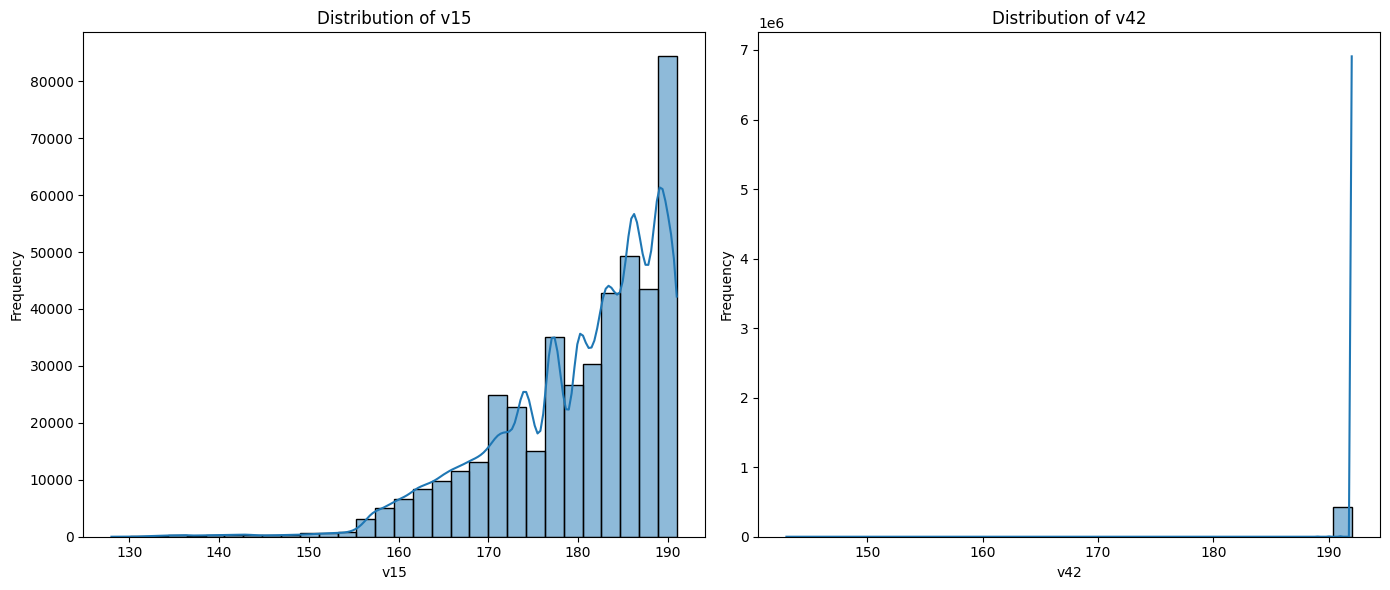

In [56]:
# Plot the distribution of 'v15' and 'v42'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 'v15'
sns.histplot(new_train_2['v15'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of v15')
axes[0].set_xlabel('v15')
axes[0].set_ylabel('Frequency')

# Plot for 'v42'
sns.histplot(new_train_2['v42'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of v42')
axes[1].set_xlabel('v42')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Re-adding the dropped 19 cols & handling them

In [57]:
new_train_3 = new_train_2.copy()
new_test_3 = new_test_2.copy()

In [58]:
# Copy columns with high missing values from org_train to new_train_3
print(new_train_3.shape)
print(new_test_3.shape)
columns_to_copy = ['v22', 'v23', 'v44', 'v47', 'v48', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v65', 'v66', 'v67']
print("Length of columns_to_copy : ", len(columns_to_copy))
new_train_3[columns_to_copy] = train_set[columns_to_copy]
new_test_3[columns_to_copy] = test_set[columns_to_copy]
new_train_3.head()
print(new_train_3.shape)
print(new_test_3.shape)

(436465, 54)
(186734, 53)
Length of columns_to_copy :  19
(436465, 73)
(186734, 72)


In [59]:
# Generate a description of missing values
description = pd.DataFrame()
df = new_train_3[columns_to_copy]

description['missing'] = df.isnull().sum()
description['non-null'] = df.notnull().sum()
description['total'] = df.shape[0]
description['dtype'] = df.dtypes
description['unique'] = df.nunique()

description 

,missing,non-null,total,dtype,unique
v22,215685,220780,436465,float64,145
v23,364241,72224,436465,float64,121
v44,316088,120377,436465,float64,165
v47,436156,309,436465,float64,230
v48,436157,308,436465,float64,279
v53,427224,9241,436465,float64,10
v54,427224,9241,436465,float64,32
v55,427224,9241,436465,float64,11
v56,427224,9241,436465,float64,16
v57,427478,8987,436465,float64,179


In [60]:
# Calculate correlation of non-null rows for each column in columns_to_copy with 'v16'
correlations = {}
for col in columns_to_copy:
    non_null_rows = new_train_3[[col, 'v16']].dropna()
    if not non_null_rows.empty:
        corr = non_null_rows[col].corr(non_null_rows['v16'])
        correlations[col] = corr

# Display the correlations
correlations

{'v22': -0.015158277693760743,
 'v23': 0.0170661251275025,
 'v44': -0.008021781324883712,
 'v47': -0.036621685579340285,
 'v48': 0.04217452385366493,
 'v53': 0.0014622220726655815,
 'v54': 0.0019166262128721228,
 'v55': 0.02625970343568728,
 'v56': 0.01683542196562728,
 'v57': -7.985935643847255e-05,
 'v58': 0.0037065980612390145,
 'v59': 0.00014960481496222147,
 'v60': -0.006501417814049988,
 'v61': -0.005457466547819228,
 'v62': 0.0016660308128227858,
 'v63': 0.009831803151710406,
 'v65': 0.011851182554413588,
 'v66': 0.029907885993860208,
 'v67': 0.038397636192444067}

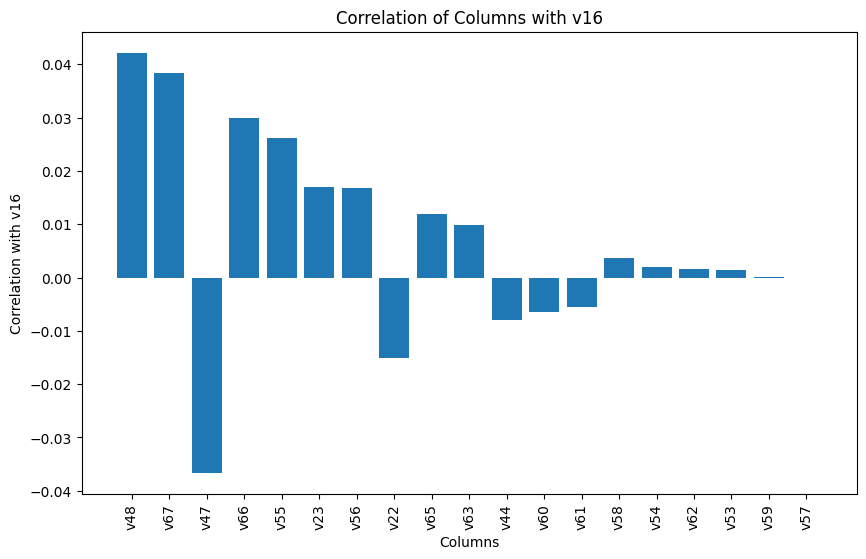

In [61]:
import matplotlib.pyplot as plt

# Sort the correlations dictionary by absolute value of correlation
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.bar(sorted_correlations.keys(), sorted_correlations.values())
plt.xlabel('Columns')
plt.ylabel('Correlation with v16')
plt.title('Correlation of Columns with v16')
plt.xticks(rotation=90)
plt.show()

In [62]:
# Filter columns with correlation greater than 0.005
sorted_correlations_series = pd.Series(sorted_correlations)
high_corr_columns = sorted_correlations_series[abs(sorted_correlations_series) > 0.005].index

needed_to_drop = [col for col in columns_to_copy if col not in high_corr_columns]

new_train_3.drop(needed_to_drop, axis=1, inplace=True)
new_test_3.drop(needed_to_drop, axis=1, inplace=True)

new_train_3.shape, new_test_3.shape

((436465, 67), (186734, 66))

In [63]:
new_train_4 = new_train_3.copy()
new_test_4 = new_test_3.copy()

Now need to fix missing in high_corr_columns 

In [64]:
high_corr_columns

Index(['v48', 'v67', 'v47', 'v66', 'v55', 'v23', 'v56', 'v22', 'v65', 'v63',
       'v44', 'v60', 'v61'],
      dtype='object')

In [65]:
# Compute the count of 1 & 0 in 'v16' for each column in high_corr_columns and show in a DataFrame

high_corr_counts = {}

for col in high_corr_columns:
    count_1 = new_train_4[new_train_4['v16'] == 1][col].count()
    count_0 = new_train_4[new_train_4['v16'] == 0][col].count()
    high_corr_counts[col] = (count_0, count_1)

# Convert the dictionary to a DataFrame
high_corr_counts_df = pd.DataFrame(list(high_corr_counts.items()), columns=['Column', 'Count of 0 & 1 in v16',])
high_corr_counts_df['0_count'] = high_corr_counts_df['Count of 0 & 1 in v16'].apply(lambda x: x[0])
high_corr_counts_df['1_count'] = high_corr_counts_df['Count of 0 & 1 in v16'].apply(lambda x: x[1])
high_corr_counts_df.drop(columns=['Count of 0 & 1 in v16'], inplace=True)
high_corr_counts_df

,Column,0_count,1_count
0,v48,306,2
1,v67,9177,64
2,v47,307,2
3,v66,9177,64
4,v55,9177,64
5,v23,69646,2578
6,v56,9177,64
7,v22,212712,8068
8,v65,9177,64
9,v63,9177,64


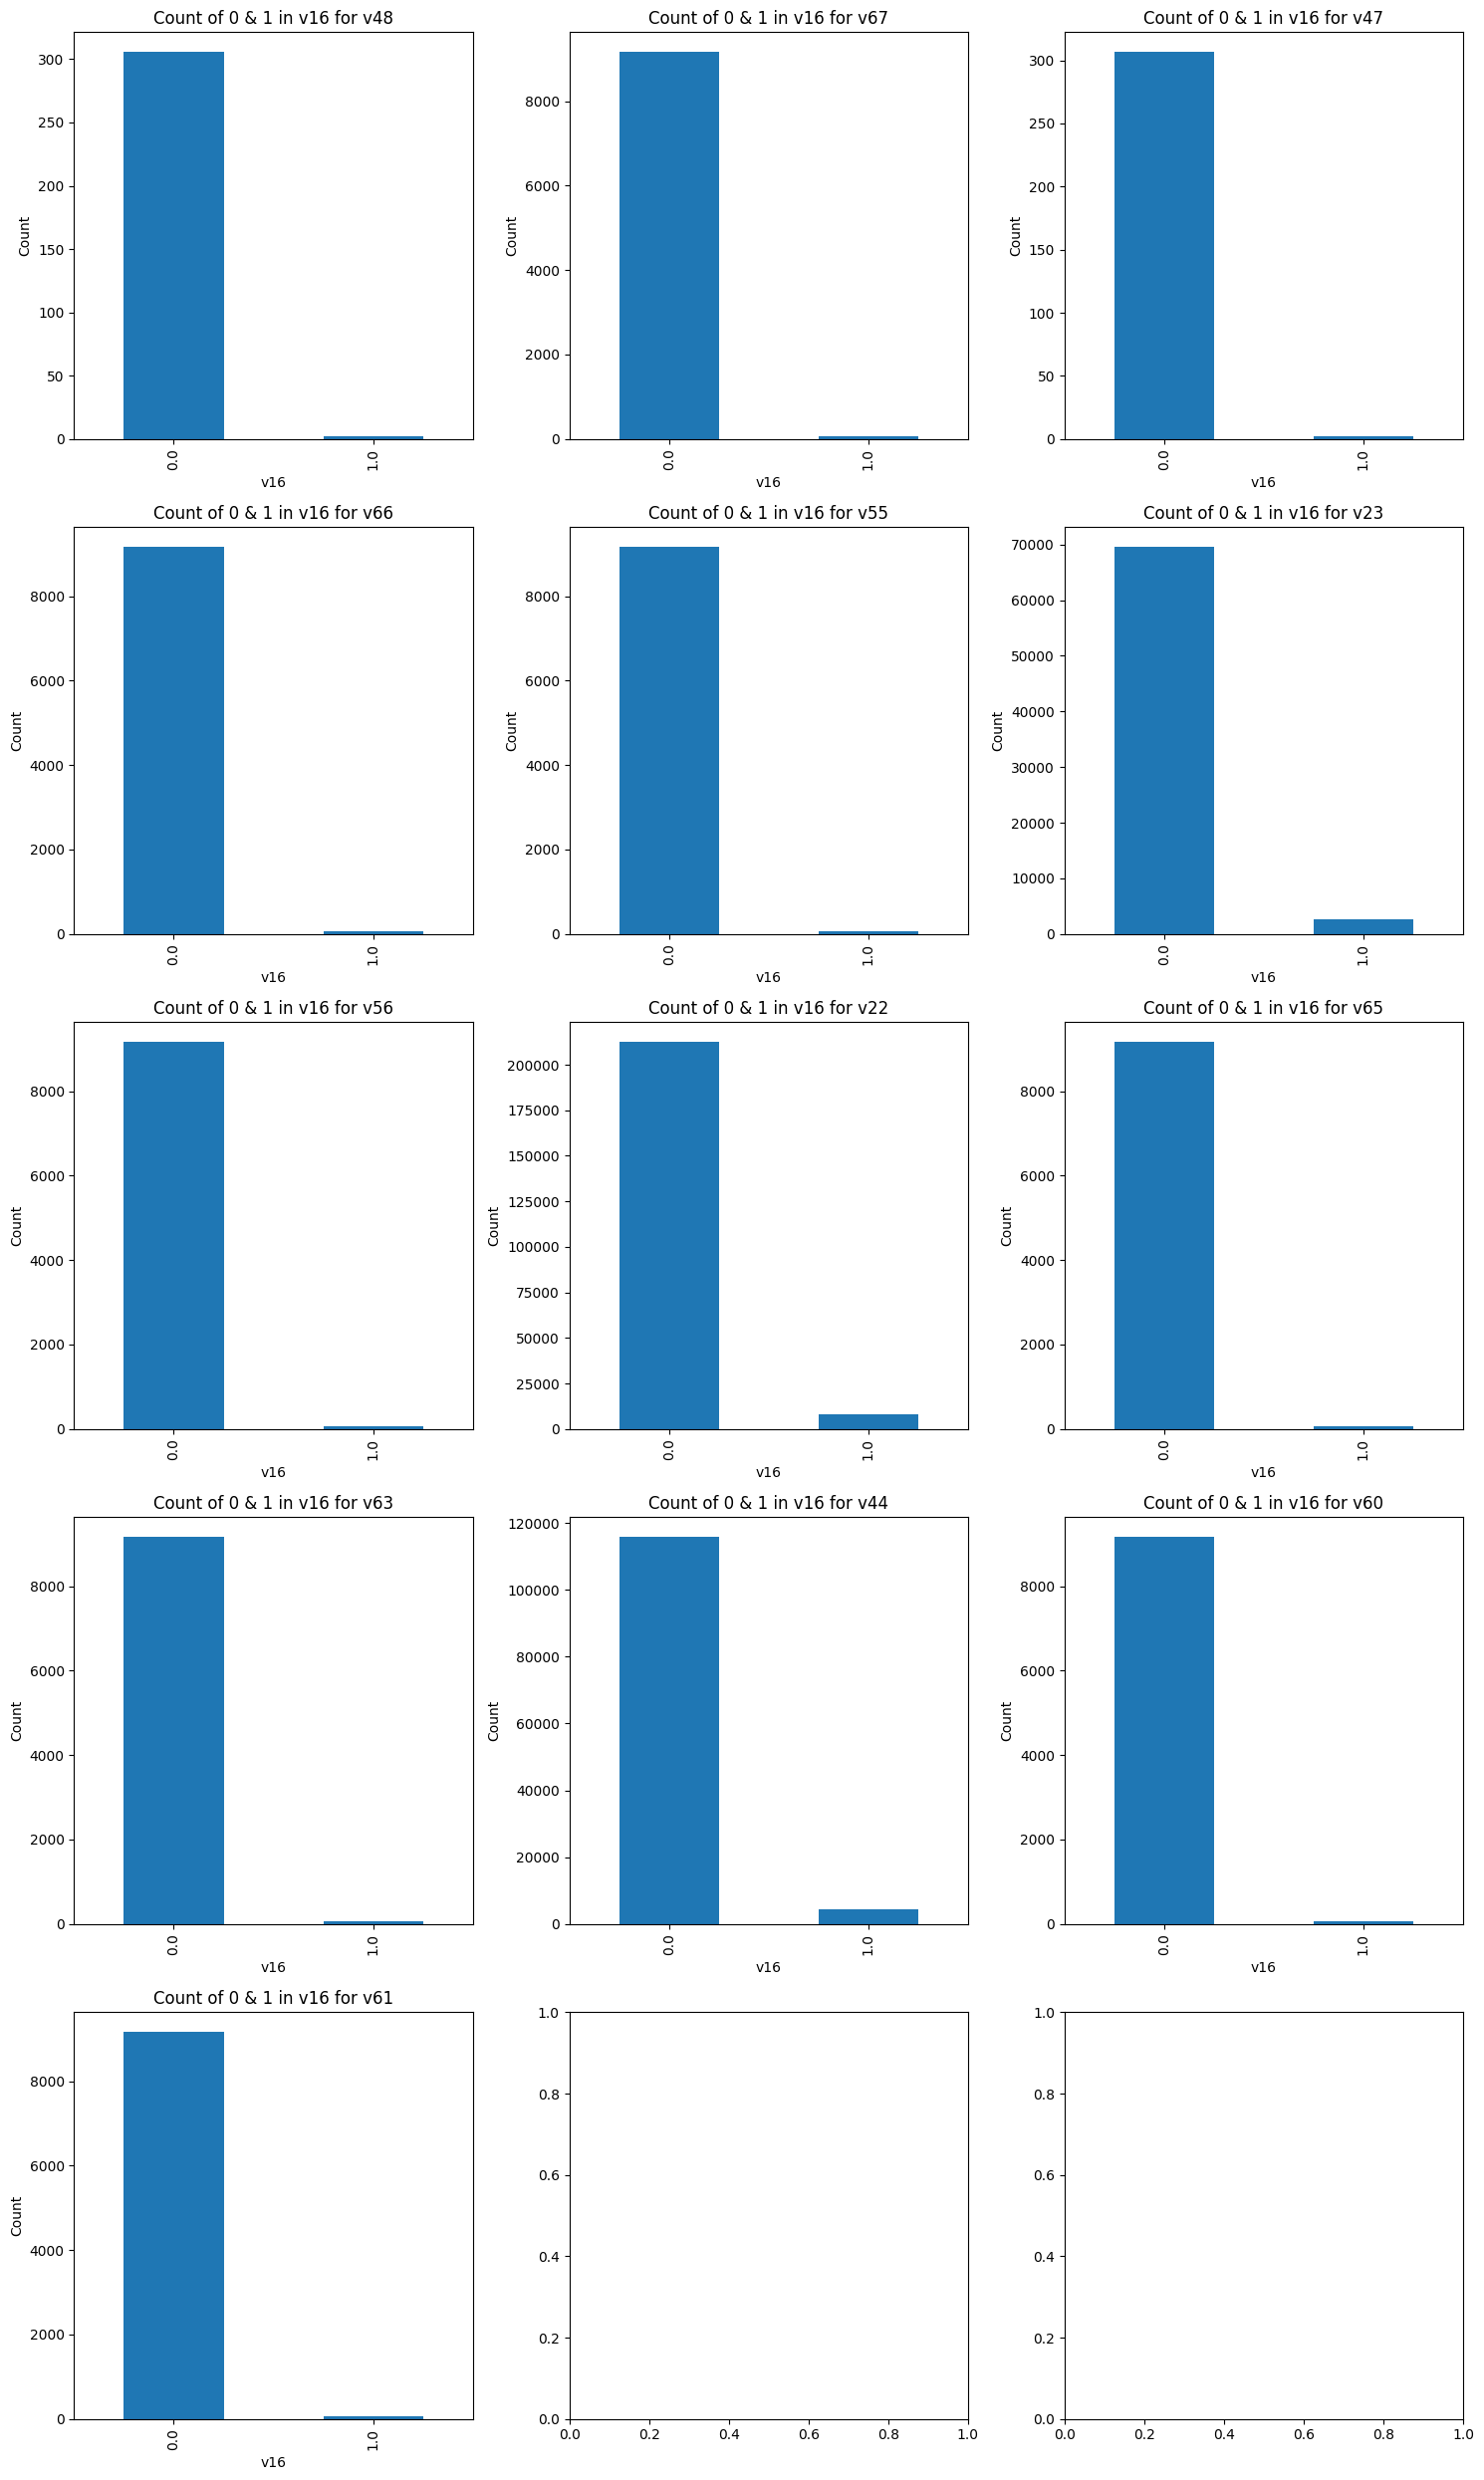

In [66]:
# Plot the count of 0 & 1 in 'v16' for each column in high_corr_columns

fig, axes = plt.subplots(len(high_corr_columns) // 3 + 1, 3, figsize=(15, 5 * (len(high_corr_columns) // 3 + 1)))

for i, col in enumerate(high_corr_columns):
    ax = axes[i // 3, i % 3]
    counts = new_train_4.groupby('v16')[col].count()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Count of 0 & 1 in v16 for {col}')
    ax.set_xlabel('v16')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [67]:
# Impute missing values in high_corr_columns with the mean or median based on skewness

for col in high_corr_columns:
    if abs(new_train_4[col].dropna().skew()) < 0.99:
        fill_value = new_train_4[col].mean()
    else:
        fill_value = new_train_4[col].median()
    
    new_train_4[col].fillna(fill_value, inplace=True)
    new_test_4[col].fillna(fill_value, inplace=True)

# Verify that there are no missing values left in high_corr_columns
print(new_train_4[high_corr_columns].isnull().sum())
print(new_test_4[high_corr_columns].isnull().sum())

v48    0
v67    0
v47    0
v66    0
v55    0
v23    0
v56    0
v22    0
v65    0
v63    0
v44    0
v60    0
v61    0
dtype: int64
v48    0
v67    0
v47    0
v66    0
v55    0
v23    0
v56    0
v22    0
v65    0
v63    0
v44    0
v60    0
v61    0
dtype: int64


## Feature Selection

In [68]:
new_train_5 = new_train_4.copy()
new_test_5 = new_test_4.copy()

In [69]:
new_train_5.shape, new_test_5.shape

((436465, 67), (186734, 66))

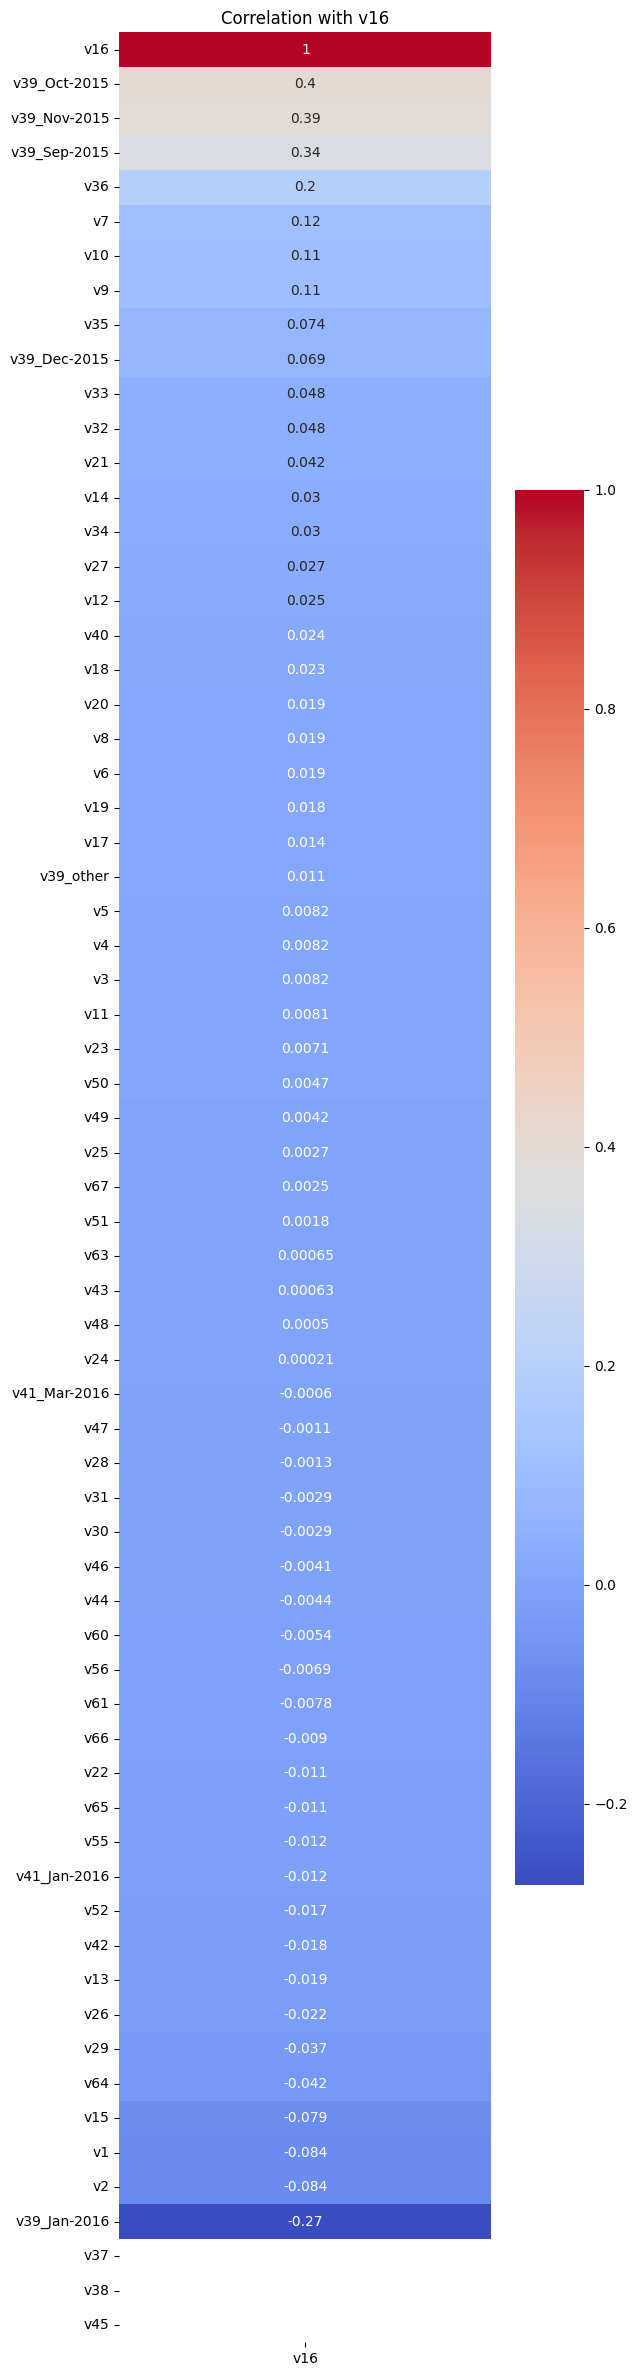

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation of all columns with 'v16'
corr_with_v16 = new_train_5.corr()['v16'].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(6, 30))
sns.heatmap(corr_with_v16.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with v16')
plt.show()


In [71]:
# Apply correlation threshold
corr_threshold = 0.005
filtered_corr_with_v16 = corr_with_v16[abs(corr_with_v16) > corr_threshold]

# Create a new DataFrame with the filtered columns
filtered_columns = filtered_corr_with_v16.index
new_train_filtered = new_train_5[filtered_columns]
filtered_columns = filtered_columns.drop('v16')
new_test_filtered = new_test_5[filtered_columns]

# Display the shape of the new DataFrames
print(new_train_filtered.shape)
print(new_test_filtered.shape)

(436465, 48)
(186734, 47)


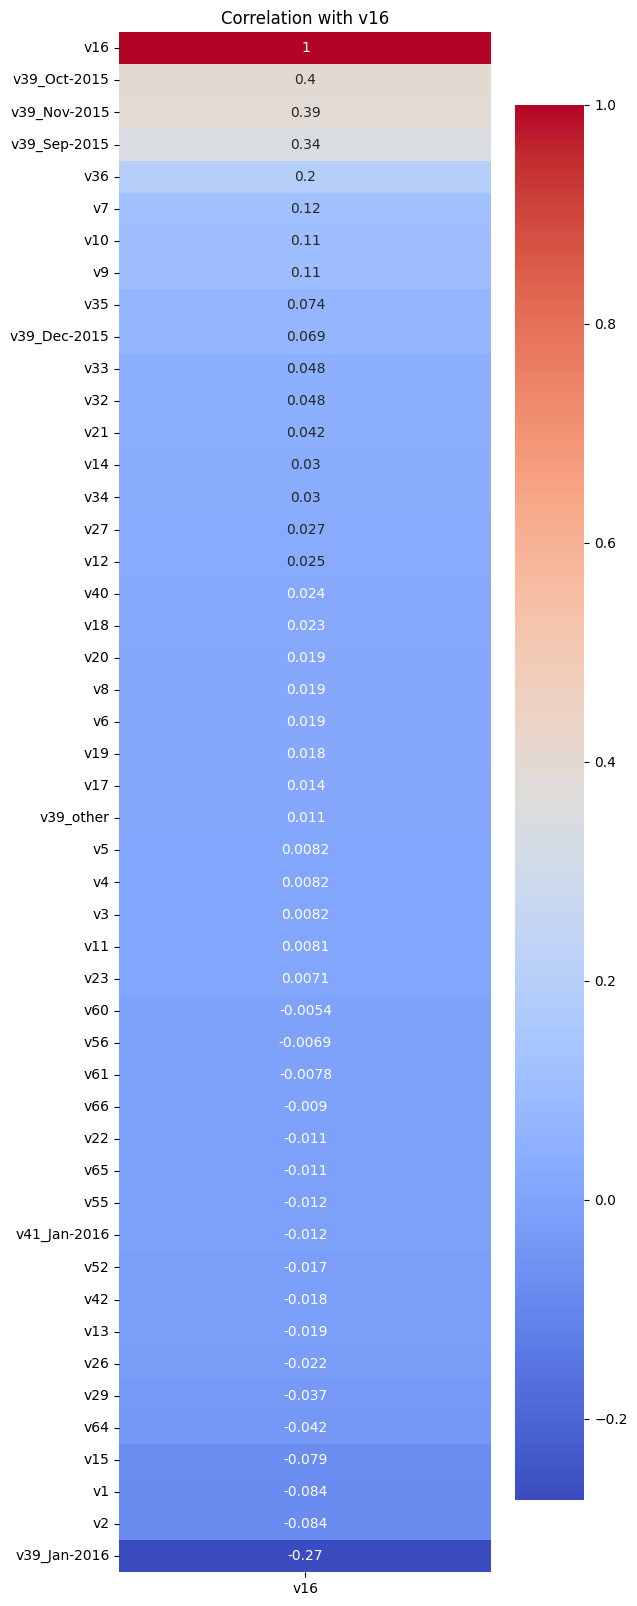

In [72]:
# Calculate correlation of all columns with 'v16'
corr_with_v16 = new_train_filtered.corr()['v16'].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(corr_with_v16.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with v16')
plt.show()

Extremely low correleated cols remove done. 

In [73]:
X = new_train_filtered.drop('v16', axis=1)
y = new_train_filtered['v16']

In [74]:
X.shape, y.shape

((436465, 47), (436465,))

In [75]:
# Apply SelectKBest with chi2 to select the best features from 47 columns to 40 columns

from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest with chi2 to select the best features
k_best_features = SelectKBest(score_func=chi2, k=40)  # Select top 40 features
X_new = k_best_features.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[k_best_features.get_support()]

print("Selected features using chi2 method:")
print(selected_features)

Selected features using chi2 method:
Index(['v39_Oct-2015', 'v39_Nov-2015', 'v39_Sep-2015', 'v36', 'v7', 'v10',
       'v9', 'v35', 'v39_Dec-2015', 'v33', 'v32', 'v21', 'v14', 'v34', 'v27',
       'v12', 'v40', 'v18', 'v20', 'v8', 'v6', 'v17', 'v39_other', 'v5', 'v4',
       'v3', 'v11', 'v23', 'v66', 'v22', 'v65', 'v55', 'v41_Jan-2016', 'v26',
       'v29', 'v64', 'v15', 'v1', 'v2', 'v39_Jan-2016'],
      dtype='object')


In [76]:
# Apply selected_features
selected_features_X = selected_features
selected_features_X = selected_features_X.append(pd.Index(['v16']))
new_train_filtered = new_train_filtered[selected_features_X]
new_test_filtered = new_test_filtered[selected_features]

## Training

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, classification_report, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import itertools

In [78]:
X = new_train_filtered.drop(columns=['v16'])
y = new_train_filtered['v16']

In [79]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.07509443, -0.07300249, -0.06544186, ...,  1.19363539,
         1.20431808,  0.56142084],
       [-0.07509443, -0.07300249, -0.06544186, ...,  0.59460646,
         0.58673928,  0.56142084],
       [-0.07509443, -0.07300249, -0.06544186, ..., -0.09352179,
        -0.09977434,  0.56142084],
       ...,
       [-0.07509443, -0.07300249, -0.06544186, ...,  0.68700288,
         0.67845782,  0.56142084],
       [-0.07509443, -0.07300249, -0.06544186, ..., -0.27189628,
        -0.27420034,  0.56142084],
       [-0.07509443, -0.07300249, -0.06544186, ..., -0.83511348,
        -0.82460838,  0.56142084]])

In [80]:
X_test_org = X_test.copy()
y_test_org = y_test.copy()

def getf1(model):
    return f1_score(y_test_org, model.predict(X_test_org), average=None)

def getf1All(model):
    return f1_score(y, model.predict(X), average=None)


In [96]:
def plot_feature_importances(model, columns):
    n_features = len(columns)
    plt.figure(figsize=(10, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
    plt.show()


def plot_confusion_matrix(model, figsize=(5, 5), y_pred=None, y_test=None):
    if model is not None:
        y_pred = model.predict(X_test_org)
        y_test = y_test_org
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Show values on the squares
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

### RandomForestClassifier

Accuracy: 0.9831372504095403
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     84389
         1.0       0.99      0.50      0.66      2904

    accuracy                           0.98     87293
   macro avg       0.98      0.75      0.83     87293
weighted avg       0.98      0.98      0.98     87293

F1 Score :  [0.99135176 0.66377341]


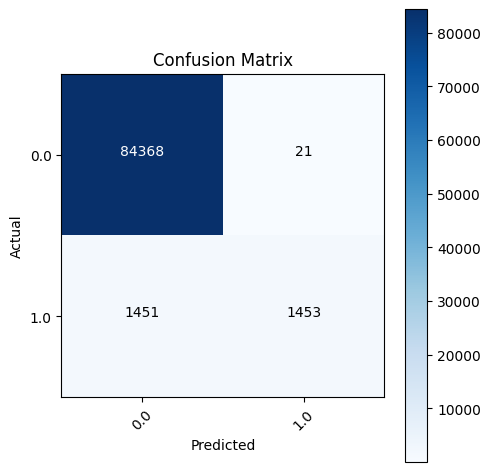

In [82]:
# train a Random Forest Classifier & evaluate the model

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("F1 Score : ", getf1(rf_classifier))
plot_confusion_matrix(rf_classifier)

Moderate Result. Need Better

### LogisticRegression

Accuracy: 0.9666639936764689
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     84389
         1.0       0.20      0.00      0.00      2904

    accuracy                           0.97     87293
   macro avg       0.58      0.50      0.49     87293
weighted avg       0.94      0.97      0.95     87293

F1 Score :  [0.98304907 0.00137268]


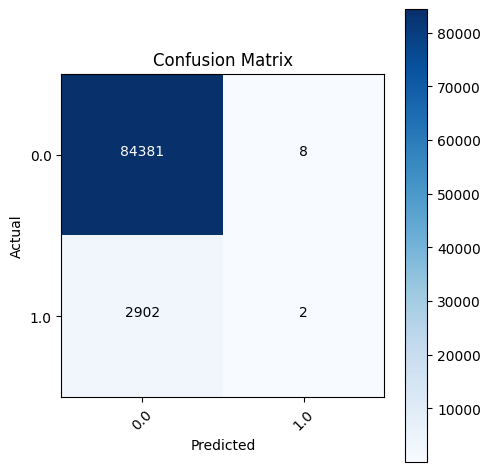

In [83]:
# train a LogisticRegression & evaluate the model

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("F1 Score : ", getf1(logistic_model))
plot_confusion_matrix(logistic_model)

Bad Result

### XGBClassifier

XGBoost handles outliers well with tree-based splits and regularization.

In [84]:
# using XGBoost Classifier as outliers are present in the dataset
from xgboost import XGBClassifier

Accuracy: 0.9837100340233467
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     84389
         1.0       0.95      0.54      0.69      2904

    accuracy                           0.98     87293
   macro avg       0.97      0.77      0.84     87293
weighted avg       0.98      0.98      0.98     87293

F1 score: [0.99163677 0.68788411]


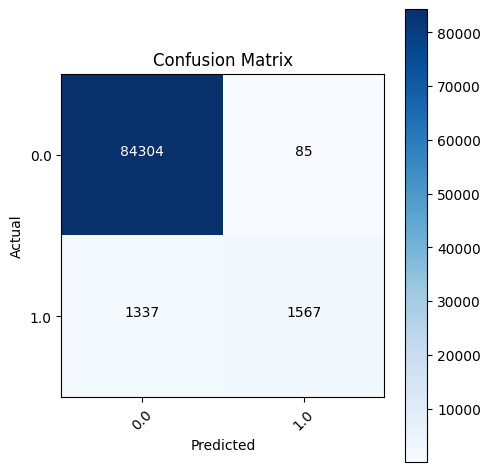

In [85]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('F1 score:', getf1(xg))
plot_confusion_matrix(xg)

F1 for class 1: 0.6878 (better than the previous model)

### CatBoostClassifier

CatBoost is also robust to outliers due to its categorical handling and symmetric tree structure

In [86]:
from catboost import CatBoostClassifier

Learning rate set to 0.125549
0:	learn: 0.4524859	total: 162ms	remaining: 2m 41s
100:	learn: 0.0621226	total: 4.29s	remaining: 38.2s
200:	learn: 0.0586470	total: 8.56s	remaining: 34s
300:	learn: 0.0563531	total: 12.7s	remaining: 29.6s
400:	learn: 0.0543420	total: 17.4s	remaining: 26s
500:	learn: 0.0525553	total: 22.1s	remaining: 22s
600:	learn: 0.0509771	total: 26.9s	remaining: 17.9s
700:	learn: 0.0496681	total: 32.2s	remaining: 13.7s
800:	learn: 0.0483796	total: 36.5s	remaining: 9.08s
900:	learn: 0.0471356	total: 40.9s	remaining: 4.5s
999:	learn: 0.0459997	total: 45.7s	remaining: 0us
Accuracy: 0.9840307928470783
F1 Score: [0.99180222 0.69295154]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     84389
         1.0       0.96      0.54      0.69      2904

    accuracy                           0.98     87293
   macro avg       0.97      0.77      0.84     87293
weighted avg       0.98      0.98      0.98     87293



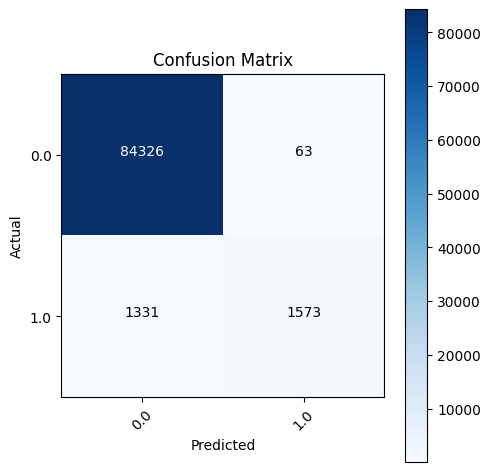

In [87]:
# train a CatBoost Classifier & evaluate the model

catboost_model = CatBoostClassifier(verbose=100)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {getf1(catboost_model)}")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(catboost_model)

F1 for 1: 0.69+ (current best)

### More Models with grid search

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Define the models to be used
# We are using GaussianNB, MultinomialNB, DecisionTreeClassifier

model_params = {
    'GNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'MNB': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
        }
    },
}

In [89]:
# Train the models and store the best score and best parameters
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    
    # scoring parameter is set to f1 score with label 1
    f1_scorer = make_scorer(f1_score, average=None, labels=[1])
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring=f1_scorer, verbose=1, n_jobs=-1)
    clf.fit(X, y)

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })
    print(scores[-1])
    
df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])
df

GNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model': 'GNB', 'best_score': 0.0, 'best_params': {}}
MNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model': 'MNB', 'best_score': 0.08618707120914529, 'best_params': {}}
decision_tree
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'model': 'decision_tree', 'best_score': 0.5669475333543003, 'best_params': {'criterion': 'entropy'}}


,model,best_score,best_params
0,GNB,0.000000,{}
1,MNB,0.086187,{}
2,decision_tree,0.566948,{'criterion': 'entropy'}


## Final Model

After all the things, CatBoostClassifier performed best. Let's run cross-val.

In [90]:
# Train a CatBoost Classifier using GridSearchCV and evaluate the model

scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)

catboost = CatBoostClassifier(verbose=0)
f1_scorer = make_scorer(f1_score, average=None, labels=[1])
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid={}, scoring=f1_scorer, cv=5, verbose=1, n_jobs=-1)

grid_search_catboost.fit(X_scaled, y)

# Get the best F1 score
best_f1_score_catboost = grid_search_catboost.best_score_
grid_search_catboost = grid_search_catboost.best_estimator_

print("Best F1 score: ", best_f1_score_catboost)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best F1 score:  0.6949224203421227


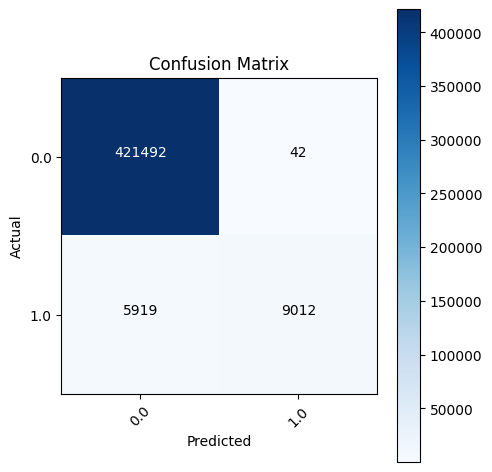

F1 Score for Class 0:  0.9929783437089564
F1 Score for Class 1:  0.7514696685428393


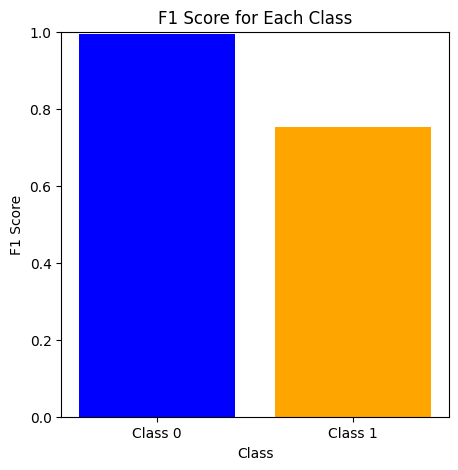

In [99]:
# Plot confusion matrix and F1 score for the total dataset using grid_search_catboost

y_pred_total = grid_search_catboost.predict(X_scaled)

# Plot confusion matrix
plot_confusion_matrix(None, figsize=(5, 5), y_pred=y_pred_total, y_test=y)

# Calculate F1 score
f1_scores = f1_score(y, y_pred_total, average=None)

print("F1 Score for Class 0: ", f1_scores[0])
print("F1 Score for Class 1: ", f1_scores[1])

# Plot F1 score
plt.figure(figsize=(5, 5))
plt.bar(['Class 0', 'Class 1'], f1_scores, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.ylim(0, 1)
plt.show()

## Test Run

Making things ready for submission

In [91]:
# getting predictions on the test set
model = grid_search_catboost
y_test_final = scaler2.transform(new_test_filtered)
test_predictions = model.predict(y_test_final)

In [92]:
test_predictions

array([0., 0., 0., ..., 0., 0., 1.])

In [93]:
# show the distribution of the predictions
unique, counts = np.unique(test_predictions, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 182996, 1.0: 3738}


In [94]:
# save the predictions to a CSV file to submit to the competition
test_file = pd.read_csv('dataset/test.csv')
submission = pd.DataFrame()
submission['id'] = test_file['id']
submission['v16'] = test_predictions
submission.to_csv('submission.csv', index=False)